<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/sanghunoh/reports/%EA%B3%BC%EC%A0%9C_4_1_PCA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. (40점) 교재 프로그램 8-1(강의자료 MATLAB 코드)을 참고하여, 특징 추출을 수행해 보시오

#(1) (10점) 다음과 같은 분포를 가진 두 클래스의 데이터를 생성하고 아래 그림과 같이 산점도를 그리시오.

In [1]:
import numpy as np
np.random.seed(50)
row_count = 100
n_dimension = 2

## 두 클래스 생성
$
\begin{align}
μ_1=\begin{pmatrix}
0 \\
0
\end{pmatrix},
μ_2=\begin{pmatrix}
0 \\
5
\end{pmatrix},
\Sigma_1=Σ_2=\begin{pmatrix}
10 & 2 \\
2 & 1
\end{pmatrix}
\end{align}
$

In [2]:
# 공통 sigma
simga_common = np.array([[10,2],[2,1]])

In [3]:
# class 1
rand_1 = np.random.randn(row_count, n_dimension)
mu_1 = np.array([0,0])
class_1 = rand_1.dot(simga_common) + mu_1
# class_1 = rand_1 @ simga_common + mu_1

rand_1.shape, class_1.shape

((100, 2), (100, 2))

In [4]:
# class 2
rand_2 = np.random.randn(row_count, n_dimension)
mu_2 = np.array([0,5])
class_2 = rand_2.dot(simga_common) + mu_2

rand_2.shape, class_2.shape

((100, 2), (100, 2))

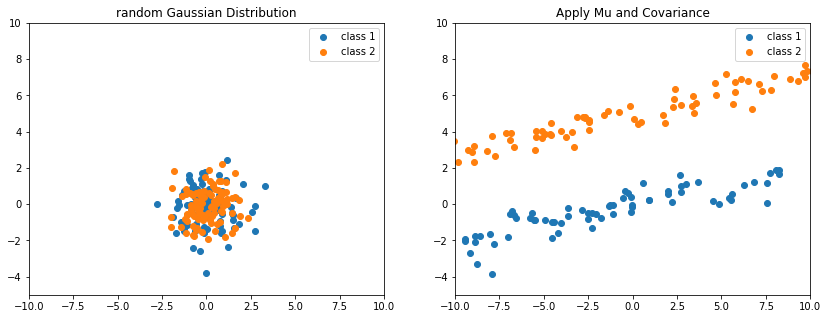

In [5]:
# 분포 확인 
import matplotlib.pyplot as plt
axis_x = [-10, 10]
axis_y = [-5, 10]

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
# random 분포
ax.scatter(rand_1[:,0],rand_1[:,1], label='class 1') 
ax.scatter(rand_2[:,0],rand_2[:,1], label='class 2')
plt.title('random Gaussian Distribution')
plt.legend()
plt.xlim(axis_x)
plt.ylim(axis_y)


ax = fig.add_subplot(122)
# 평균과 공분산 적용
ax.scatter(class_1[:,0],class_1[:,1], label='class 1') 
ax.scatter(class_2[:,0],class_2[:,1], label='class 2')
plt.title('Apply Mu and Covariance')
plt.xlim(axis_x)
plt.ylim(axis_y)
plt.legend()

plt.show()


#(2) (20점) (1)에서 생성한 데이터에 대해 PCA를 적용하여 첫 번째 주성분 벡터를 찾고 이를 아래 그림2와 같이 2차원 평면상에 표시하시오. 이를 LDA에 대해서도 수행하고 함께 출력하시오.

## PCA(Principal Component Analysis)

### 비지도 학습 위해 두 클래스 합하기

In [6]:
class_all = np.vstack([class_1, class_2])
class_all.shape

(200, 2)

### Centering Data : 이미 되어 있어 하지 않아도 됨

In [7]:
norm_class_all = class_all - class_all.mean(axis=0)
class_all_centering = norm_class_all/norm_class_all.std(axis=0)
class_all_centering.shape

(200, 2)

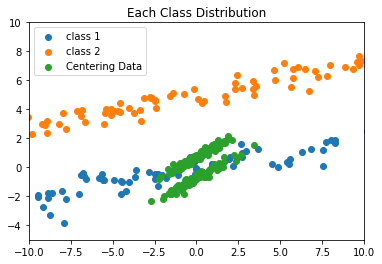

In [8]:
plt.scatter(class_1[:,0],class_1[:,1], label='class 1') 
plt.scatter(class_2[:,0],class_2[:,1], label='class 2')
plt.scatter(class_all_centering[:,0],class_all_centering[:,1], label='Centering Data')

plt.title('Each Class Distribution')
plt.legend()
plt.xlim(axis_x)
plt.ylim(axis_y)
plt.show()

##Computing eigen values and eigen vectors

In [9]:
# 공분산 구하기
class_all_centering_sigma = np.cov(class_all_centering.T)
eigen_values_pca, eigen_vectors_pca = np.linalg.eig(class_all_centering_sigma)
eigen_values_pca, eigen_vectors_pca

(array([1.66656578, 0.34348447]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [10]:
# 벡터별 정보 보유율
for idx, eigen_value in enumerate(eigen_values_pca):
  print('index {}, rate:{:.2f} %'.format(idx, eigen_value/sum(eigen_values_pca)*100))

index 0, rate:82.91 %
index 1, rate:17.09 %


##LDA(Linear Discriminant Analysis)

###Computing Covariance
$
\begin{align}
J(w) = \frac{w^T(m_1-M_2)(m_1-m_2)^Tw}{w^T\sum_{k=1}^{2}\sum_{x_i∈C_k}(m_i-M_k)(m_i-m_k)^Tw}
= \frac{w^TS_{between}w}{w^TS_{within}w}
\end{align}
$

In [11]:
# 각 클래스 평균과 공분산 구하기
class_1_mu = np.mean(class_1,axis=0)
class_1_sigma = np.cov(class_1.T)
class_2_mu = np.mean(class_2,axis=0)
class_2_sigma = np.cov(class_2.T)

In [12]:
# within scatter
Sw = class_1_sigma + class_2_sigma
# between scatter
Sb = (class_1_mu-class_2_mu).T * (class_1_mu-class_2_mu)
Sw, Sb

(array([[211.39013972,  45.08600007],
        [ 45.08600007,  10.26147933]]), array([ 0.3585093 , 26.68441256]))

In [13]:
# J covariance 
Jcov = Sb * np.linalg.inv(Sw)
Jcov

array([[ 2.69653724e-02, -8.81851332e+00],
       [-1.18478120e-01,  4.13464659e+01]])

##Computing the Eigenvectors and Eigenvalues

In [14]:
eigen_values_lda, eigen_vectors_lda = np.linalg.eig(Jcov.T)
# eigen_values.shape, eigen_vectors.shape
eigen_values_lda, eigen_vectors_lda

(array([1.69492446e-03, 4.13717363e+01]), array([[-0.97800106,  0.0028656 ],
        [-0.20859991, -0.99999589]]))

In [15]:
# 벡터별 정보 보유율
for idx, eigen_value in enumerate(eigen_values_lda):
  print('index {}, rate:{:.2f} %'.format(idx, eigen_value/sum(eigen_values_lda)*100))

index 0, rate:0.00 %
index 1, rate:100.00 %


##PCA와 LDA 벡터 표시

In [16]:
# 표시 위해 사이즈 증가
scala_size = 20 # 표시 위해 scalar 변경 eigen_vectors_pca[0] 
start_point = np.zeros((2))
eigen_vector_pca = np.vstack([start_point,eigen_vectors_pca.T[0] * scala_size])
eigen_vector_lda =np.vstack([start_point,eigen_vectors_lda.T[1] * scala_size])
eigen_vector_pca, eigen_vector_lda

(array([[ 0.        ,  0.        ],
        [14.14213562, 14.14213562]]), array([[  0.        ,   0.        ],
        [  0.05731203, -19.99991788]]))

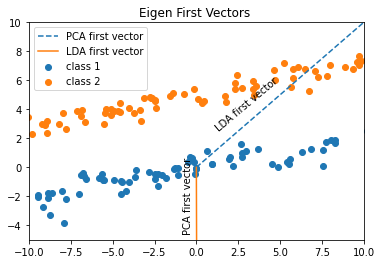

In [36]:
plt.scatter(class_1[:,0],class_1[:,1], label='class 1') 
plt.scatter(class_2[:,0],class_2[:,1], label='class 2')
plt.plot(eigen_vector_pca[:,0], eigen_vector_pca[:,1], label='PCA first vector', ls='--')
plt.annotate('PCA first vector', xy=(0, 0), xytext=(-0.5, -4.5), fontsize=10, ha='center', rotation= 90)
plt.plot(eigen_vector_lda[:,0], eigen_vector_lda[:,1], label='LDA first vector')
plt.annotate('LDA first vector', xy=(0, 0), xytext=(3, 2.5), fontsize=10, ha='center', rotation= 40)

plt.title('Eigen First Vectors ')
plt.legend()
plt.xlim(axis_x)
plt.ylim(axis_y)
plt.show()

# (3) (10점) PCA의 결과와 LDA의 결과를 그림으로 비교하고 두 결과의 차이를 간단히 서술하시오.

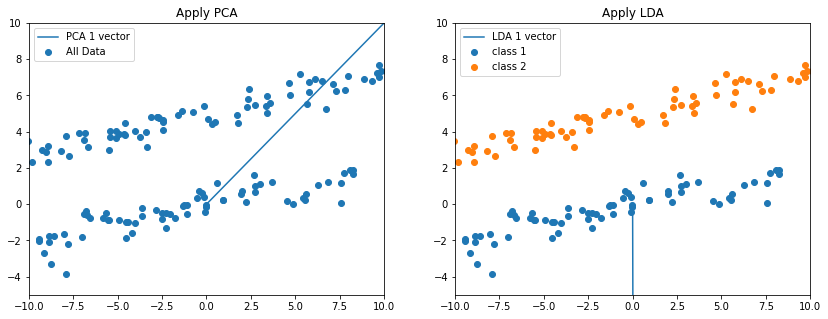

In [18]:
# 분포 확인 
import matplotlib.pyplot as plt
axis_x = [-10, 10]
axis_y = [-5, 10]

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
# random 분포
ax.scatter(class_all[:,0],class_all[:,1], label='All Data')
ax.plot(eigen_vector_pca[:,0], eigen_vector_pca[:,1], label='PCA 1 vector')
plt.title('Apply PCA')
plt.legend()
plt.xlim(axis_x)
plt.ylim(axis_y)


ax = fig.add_subplot(122)
# 평균과 공분산 적용
ax.scatter(class_1[:,0],class_1[:,1], label='class 1') 
ax.scatter(class_2[:,0],class_2[:,1], label='class 2')
ax.plot(eigen_vector_lda[:,0], eigen_vector_lda[:,1], label='LDA 1 vector')
plt.title('Apply LDA')
plt.xlim(axis_x)
plt.ylim(axis_y)
plt.legend()

plt.show()


1. PCA : 분류되지 않은 데이터에 적용해 eigen Vector를 찾을 수 있다.
2. LDA : 분류된 데이터에 적용 가능하며, PCA를 보완 가능하다.